## Numerical Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../data/Visa_Predection_Dataset.csv"
df = pd.read_csv(file_path)
print("Dataset read successfully")

Dataset read successfully


In [39]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
s1_wage = df['prevailing_wage'] # as a series

In [5]:
s1_wage.values

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ], shape=(25480,))

In [6]:
type(df['prevailing_wage'].values)

numpy.ndarray

- count
- min
- max
- mean
- median

In [14]:
print(s1_wage.count())
print(s1_wage.min())
print(s1_wage.max())
print(s1_wage.mean())
print(round(s1_wage.median(), 2))

25480
2.1367
319210.27
74455.81459209183
70308.21


In [8]:
# doesn't apply for the numerical columns
s1_wage.nunique()

25454

In [9]:
# doesn't apply for the numerical columns
s1_wage.value_counts()

prevailing_wage
82560.2800     2
122.6500       2
60948.1500     2
64357.5800     2
108.1200       2
              ..
25713.9800     1
101656.6400    1
65665.5500     1
50.8813        1
70876.9100     1
Name: count, Length: 25454, dtype: int64

In [153]:
wage_count = round(s1_wage.count(), 2)
wage_min = round(s1_wage.min(), 2),
wage_max = round(s1_wage.max(), 2),
wage_mean = round(s1_wage.mean(), 2),
wage_median = round(s1_wage.median(), 2),
wage_std = round(s1_wage.std(), 2)

# creating dataframe using dictionary and list
wage_dict = {
    'count': wage_count,
    'min': wage_min,
    'max': wage_max,
    'median': wage_median,
    'std': wage_std
}

wage_df = pd.DataFrame(wage_dict, index=["prevailing_wage"])

In [36]:
wage_df

,count,min,max,median,std
prevailing_wage,25480,2.1367,319210.27,70308.21,52815.942327


In [32]:
wage_list = [wage_count, wage_min, wage_max, wage_median, wage_std]
indx = ["count", "min", "max", "median"]

pd.DataFrame(zip(wage_list), index=indx,  columns=["prevailing_wage"])

,prevailing_wage
count,25480.0000
min,2.1367
max,319210.2700
median,70308.2100


In [53]:
data_types = dict(df.dtypes)
num = [i for i in data_types if data_types[i] != 'O']

In [56]:
df[num]

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


In [128]:
dict_df_num = {}
for i in num:
    COUNT = round(df[i].count(),2)
    MIN = round(df[i].min(),2)
    MAX = round(df[i].max(),2)
    MEAN = round(df[i].mean(),2)
    MEDIAN = round(df[i].median(),2)
    sd = round(df[i].std(),2)
    q1 = np.percentile(df[i], 25)
    q2 = np.percentile(df[i], 50)
    q3 = np.percentile(df[i], 75)

    list1 = [COUNT, MIN, MAX, MEAN, MEDIAN, sd, q1, q2, q3]
    dict_df_num[i] = list1
    df_num = pd.DataFrame(dict_df_num, index=["count", "min", "max", "mean", "median", "sd", "q1", "q2", "q3"])
df_num

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.0000
min,-26.00,1800.00,2.1400
max,602069.00,2016.00,319210.2700
mean,5667.04,1979.41,74455.8100
median,2109.00,1997.00,70308.2100
sd,22877.93,42.37,52815.9400
q1,1022.00,1976.00,34015.4800
q2,2109.00,1997.00,70308.2100
q3,3504.00,2005.00,107735.5125


In [105]:
list_df_num = []
for i in num:
    COUNT = round(df[i].count(),2)
    MIN = round(df[i].min(),2)
    MAX = round(df[i].max(),2)
    MEAN = round(df[i].mean(),2)
    MEDIAN = round(df[i].median(),2)

    list1 = [COUNT, MIN, MAX, MEAN, MEDIAN]
    list_df_num.append(list1)
df_num = pd.DataFrame(list_df_num, index=num, columns=["count", "min", "max", "mean", "median"]).T
list_df_num

[[np.int64(25480),
  np.int64(-26),
  np.int64(602069),
  np.float64(5667.04),
  np.float64(2109.0)],
 [np.int64(25480),
  np.int64(1800),
  np.int64(2016),
  np.float64(1979.41),
  np.float64(1997.0)],
 [np.int64(25480),
  np.float64(2.14),
  np.float64(319210.27),
  np.float64(74455.81),
  np.float64(70308.21)]]

In [106]:
df_num

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
min,-26.00,1800.00,2.14
max,602069.00,2016.00,319210.27
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21


In [110]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [111]:
# we implemented describe function using our skills

In [114]:
df['prevailing_wage'].mean()

np.float64(74455.81459209183)

In [115]:
# np.mean(<specific column data>)

In [117]:
print(np.mean(df['prevailing_wage']))
print(np.min(df['prevailing_wage']))
print(np.max(df['prevailing_wage']))
print(np.median(df['prevailing_wage']))
print(np.std(df['prevailing_wage']))

74455.81459209183
2.1367
319210.27
70308.20999999999
52814.90589711416


#### $percentile - quantile$

- percentile ranges from 1 to 100
- quantile q1=25p q2=50p q3=75p
- np.percentile(<direct number between 1 to 100>, data)
- ex: np.percentile(75,data)
- np.quantile(<decimal number>, data)
- ex: np.qualtile(0.75,data)

In [129]:
q1 = np.percentile(df['prevailing_wage'], 25)
q2 = np.percentile(df['prevailing_wage'], 50)
q3 = np.percentile(df['prevailing_wage'], 75)
print(q1, q2, q3)

34015.479999999996 70308.20999999999 107735.51250000001


In [124]:
q1 = round(np.quantile(df['prevailing_wage'], 0.25), 2)
q2 = round(np.quantile(df['prevailing_wage'], 0.50), 2)
q3 = round(np.quantile(df['prevailing_wage'], 0.75), 2)
print(q1, q2, q3)

34015.48 70308.21 107735.51


In [135]:
len(df[df['prevailing_wage'] < 34015])

6370

#### $Empirical$ $rule$


![Empirical Rule](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_empirical-rule.jpg)

In [140]:
# when data follows a normal distribution
wage_mean, wage_std

((np.float64(74455.81),), np.float64(52815.94))

In [154]:
# ################### 68.27% ###################
val_minus_1 = wage_mean - 1 * wage_std
val_plus_1 = wage_mean + 1 * wage_std
# ################### 95.45 ###################
val_minus_2 = wage_mean - 2 * wage_std
val_plus_2 = wage_mean + 2 * wage_std
# ################### 99.73 ###################
val_minus_3 = wage_mean - 3 * wage_std
val_plus_3 = wage_mean + 3 * wage_std

print(val_minus_1, val_plus_1, val_minus_2, val_plus_2, val_minus_3, val_plus_3)

[21639.87] [127271.75] [-31176.07] [180087.69] [-83992.01] [232903.63]


- 68% of observations have values between [21639.87] [127271.75]
- 95% of observations have values between [-31176.07] [180087.69]
- 99% of observations have values between [-83992.01] [232903.63]


In [155]:
con1 = df['prevailing_wage']>val_minus_1[0]
con2 = df['prevailing_wage']<val_plus_1[0]
len(df[con1&con2])

17171

In [157]:
(17171 / 25480) * 100

67.3901098901099

In [158]:
con1 = df['prevailing_wage']>val_minus_2[0]
con2 = df['prevailing_wage']<val_plus_2[0]
len(df[con1&con2])

24582

In [159]:
(24582 / 25480) * 100

96.4756671899529

In [160]:
con1 = df['prevailing_wage']>val_minus_3[0]
con2 = df['prevailing_wage']<val_plus_3[0]
len(df[con1&con2])

25186

In [161]:
(25186 / 25480) * 100

98.84615384615385

In [162]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### From the above prevailing_wage column, we did as follows:
- performed statistical analysis (count, min, max, mean, median, std, q1, q2, q3)
- performed empirical rule analysis
- empirical rule: 68-95-99
- p_wage : 67.3-96.47-98.84
- wage_mean: 74455
- wage_median: 70308.21
- median < mean
- that means the data might be right skewed
- but percentage of data almost valid with the empirical rule
- overall it looks like normal distribution and slightly right skewed
- In order to see that draw **histogram**.

(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

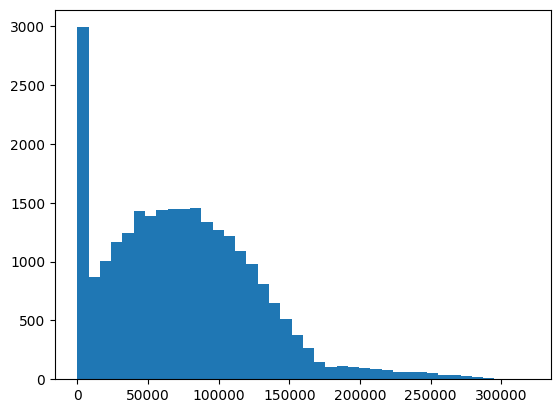

In [174]:
plt.hist(df['prevailing_wage'], bins=40, )
# plt.show() 
# by default it will give as 10 intervals
# if you want to increase the intervals
# argument name bins

#### 2992 observations are between between 2.1367, 7982.34
#### 871 observations are between between 7982.34, 15962.54

40

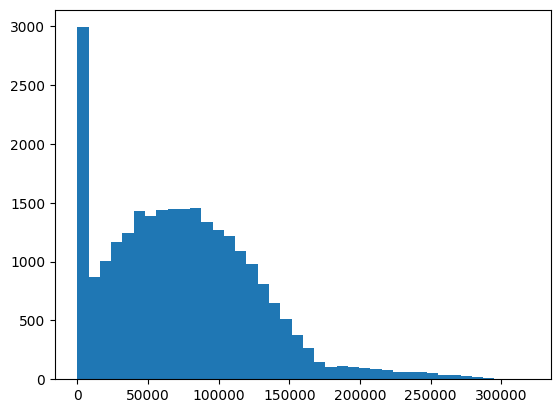

In [178]:
frequency, interval, n = plt.hist(df['prevailing_wage'], bins=40)
# frequency means number of observations fall between an interval
# interval
# n = number of intervals or bins 


In [180]:
frequency

array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
       1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
        509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
         79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
          7.,    3.,    6.,    5.])

In [181]:
interval

array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
       3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
       6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
       9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
       1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
       1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
       1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
       2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
       2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
       2.87289457e+05, 2.95269660e+05, 3.03249863e+05, 3.11230067e+05,
       3.19210270e+05])

In [182]:
n

<BarContainer object of 40 artists>

In [185]:
len(frequency), len(interval), len(n)

(40, 41, 40)

In [193]:
# step-1: con1 = col_value > 2.13
# step-2: con2 = col_value < 7982.34
# step-3: con1&con2
# step-4: col[col1&col2]
# step-5: len(col[col1&col2])

con1 = df['prevailing_wage'] > 2.13
con2 = df['prevailing_wage'] < 7982.34
df['prevailing_wage'][con1&con2]
len(df['prevailing_wage'][con1&con2])

2992

In [194]:
con1 = df['prevailing_wage'] > 7982.34
con2 = df['prevailing_wage'] < 15962.54
df['prevailing_wage'][con1&con2]
len(df['prevailing_wage'][con1&con2])

871

In [196]:
len(df['prevailing_wage'].between(1.59625434e+04, 2.39427467e+04)) # using between method

25480